## Configuration

In [11]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np

# Path to the image directory
image_dir = "food-101/images"

# List of classes (folders inside images/)
classes = os.listdir(image_dir)

# Select specific classes (here we are taking the first 5 classes)
classes_to_use = classes[:5]  

## Image visualisation

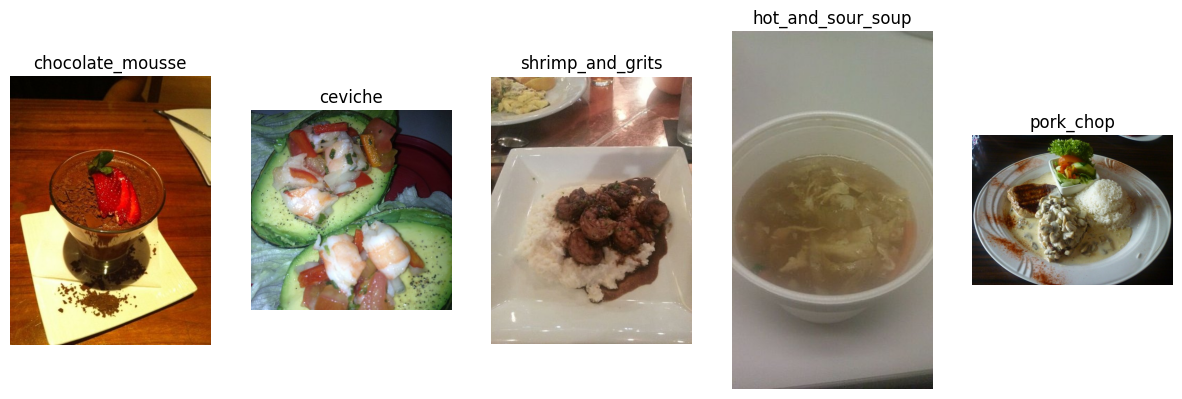

In [12]:
# Display images from the selected classes
random_images = []
for class_name in classes_to_use:
    class_path = os.path.join(image_dir, class_name)
    image_name = random.choice(os.listdir(class_path))  # Choose a random image from the class
    image_path = os.path.join(class_path, image_name)
    random_images.append((image_path, class_name))  # Store the path and class name

# Show images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, (img_path, label) in zip(axes, random_images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.show()


## Data Augmentation & Data Generators

In [3]:
# Parameters
img_size = (128, 128)  # Image size
batch_size = 64  # Number of images per batch
train_dir = "food-101/images"  # Directory containing images

# Image generator for training (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization (0-1)
    validation_split=0.2,  # 20% of images for validation
    horizontal_flip=True,
    rotation_range=20
)

# Load images only from the selected classes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    classes=classes_to_use  # Load only the selected classes
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    classes=classes_to_use  # Load only the selected classes
)


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


## Model Definition

In [4]:
# Define the model
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    # Block 2
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    # Block 3
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    # Fully Connected Layer
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(len(classes_to_use), activation="softmax")  # Number of classes
])

## Compilation

In [5]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

## Training

In [6]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)


Epoch 1/30
63/63 [==============================] - 66s 1s/step - loss: 1.5552 - accuracy: 0.2975 - val_loss: 1.4320 - val_accuracy: 0.3810
Epoch 2/30
63/63 [==============================] - 58s 919ms/step - loss: 1.4208 - accuracy: 0.3923 - val_loss: 1.3839 - val_accuracy: 0.4130
Epoch 3/30
63/63 [==============================] - 60s 945ms/step - loss: 1.3447 - accuracy: 0.4448 - val_loss: 1.2111 - val_accuracy: 0.5300
Epoch 4/30
63/63 [==============================] - 59s 938ms/step - loss: 1.2480 - accuracy: 0.4888 - val_loss: 1.1625 - val_accuracy: 0.5460
Epoch 5/30
63/63 [==============================] - 56s 878ms/step - loss: 1.1873 - accuracy: 0.5180 - val_loss: 1.1466 - val_accuracy: 0.5520
Epoch 6/30
63/63 [==============================] - 53s 838ms/step - loss: 1.1363 - accuracy: 0.5477 - val_loss: 1.1138 - val_accuracy: 0.5560
Epoch 7/30
63/63 [==============================] - 51s 805ms/step - loss: 1.0916 - accuracy: 0.5705 - val_loss: 1.0448 - val_accuracy: 0.6040
Ep

## Evaluation

In [7]:
# Evaluate on the validation set
loss, accuracy = model.evaluate(val_generator)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


16/16 [==============================] - 8s 498ms/step - loss: 0.9471 - accuracy: 0.6530
Loss: 0.9471, Accuracy: 0.6530


## Plotting

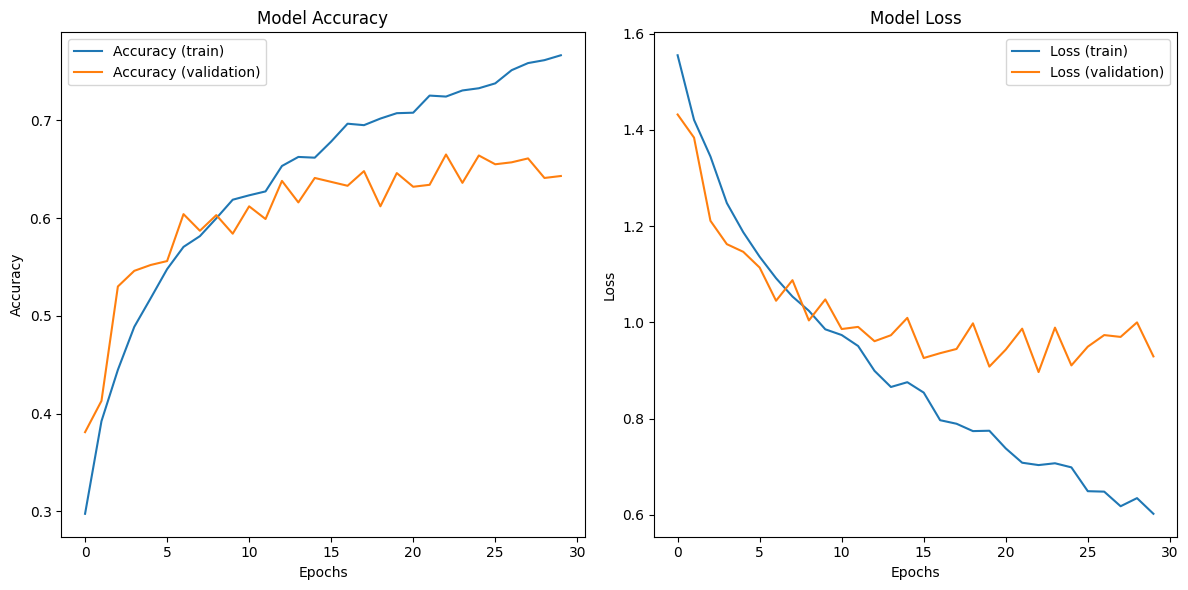

In [8]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss data from the history object
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(acc, label='Accuracy (train)')
plt.plot(val_acc, label='Accuracy (validation)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss (train)')
plt.plot(val_loss, label='Loss (validation)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the graphs
plt.tight_layout()
plt.show()


16/16 [==============================] - 7s 450ms/step
Classification Report:
                   precision    recall  f1-score   support

 chocolate_mousse     0.1726    0.1700    0.1713       200
          ceviche     0.2356    0.2250    0.2302       200
 shrimp_and_grits     0.2047    0.1750    0.1887       200
hot_and_sour_soup     0.2160    0.2300    0.2228       200
        pork_chop     0.2281    0.2600    0.2430       200

         accuracy                         0.2120      1000
        macro avg     0.2114    0.2120    0.2112      1000
     weighted avg     0.2114    0.2120    0.2112      1000


Confusion Matrix:


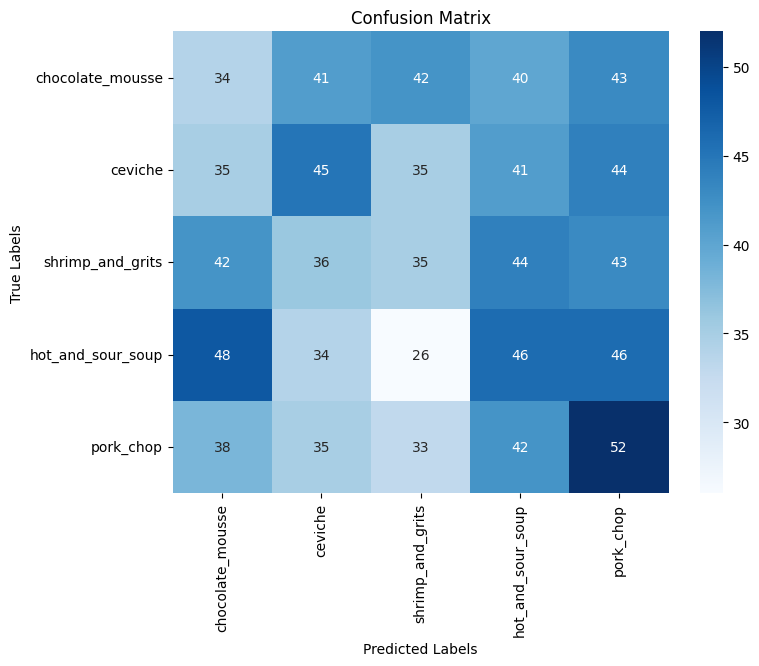

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Get true labels (in categorical format)
y_true = val_generator.classes

# Generate classification report
class_names = list(val_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names,
    digits=4
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()